# **Milage prediction-Regrassion Analysis**

Predict the FMilage prediction program based on:

1. Fuel Efficiency Optimization
2. Electric Vehicle (EV) Range Anxiety Reduction
3. Fleet Management
4. Environmental Impact
5. Cost Savings



In [ ]:
# Step 1 : import library
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
#  Step 2 : import data
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv',)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [ ]:
 # Step 3 : data preprocessing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr

<bound method DataFrame.corr of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[392 rows x 9 columns]>

In [ ]:
# step 4 : remove missing value
df= df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


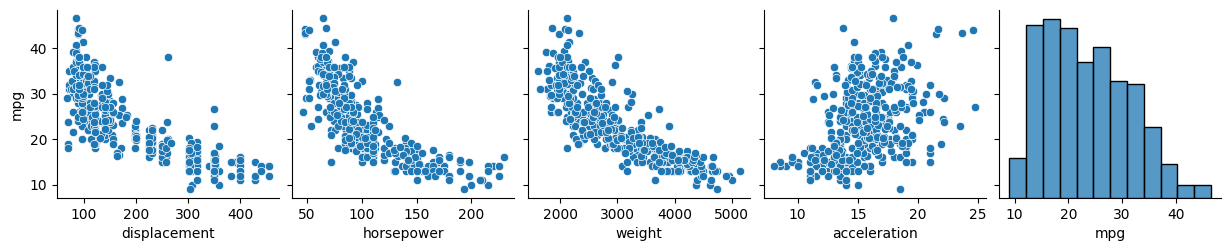

In [76]:
#  Step 5 : data visulization 
sns.pairplot(df,x_vars = ['displacement', 'horsepower', 'weight','acceleration','mpg'], y_vars = ['mpg']);

<Axes: xlabel='displacement', ylabel='mpg'>

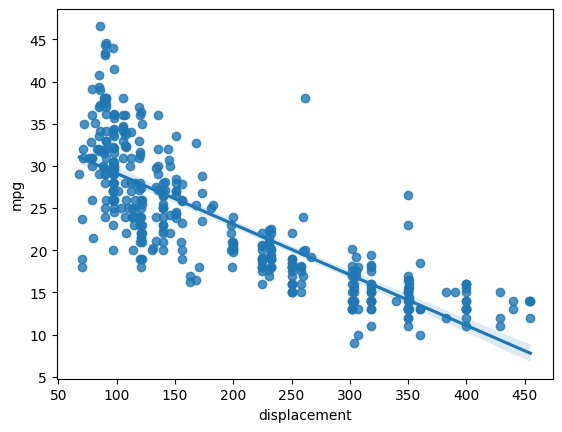

In [79]:
sns.regplot(x ='displacement', y = 'mpg', data = df)

In [80]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [78]:
# Step 6: define target variable y and features x
y = df['mpg']
y.shape

(392,)

In [129]:
x = df[ ['displacement', 'horsepower', 'weight','acceleration']]
x.shape


(392, 4)

In [130]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [131]:
# Step 7: scaling data 
from sklearn.preprocessing import StandardScaler

In [132]:
ss = StandardScaler()

In [133]:
x = ss.fit_transform(x)

In [134]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [135]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [155]:
# Step 8: train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=2529)

# Identify columns with non-numeric data
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (example using one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # Handle unseen values in test data
X_train_encoded = encoder.fit_transform(X_train[non_numeric_cols])
X_test_encoded = encoder.transform(X_test[non_numeric_cols])

# Convert sparse matrix to dense array (if needed)
X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

# Drop original non-numeric columns and concatenate encoded features
X_train = X_train.drop(non_numeric_cols, axis=1)
X_test = X_test.drop(non_numeric_cols, axis=1)
X_train = np.concatenate((X_train, X_train_encoded), axis=1)
X_test = np.concatenate((X_test, X_test_encoded), axis=1)

# Now you can fit the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [156]:
model.intercept_

-6.974565687938213

In [157]:
model.coef_

array([-3.36480963e-01, -1.51024025e-02, -1.56771222e-02, -3.39120353e-03,
       -4.75571616e-01,  7.24596519e-01,  8.60004099e-01,  6.21333054e-01,
       -1.48133715e+00, -2.37835763e+00,  1.39307670e+00,  8.41072778e-01,
       -4.31717410e-01, -1.92595511e+00, -6.03256274e-01, -1.44075151e+00,
       -8.85699306e-01, -1.43219610e+00,  1.70364719e-01, -2.41551277e+00,
        7.17553982e-01, -7.71650204e-01, -1.09795985e+00, -5.63067621e+00,
        1.41449731e+00, -7.66970912e+00,  8.57492830e+00,  9.93591883e-01,
       -1.41771525e-01, -8.37712655e+00,  1.57962420e+00, -1.69763879e+00,
        9.96071127e-01, -1.33268763e+00,  3.92084790e-01,  1.38001107e+00,
        1.28493467e+00, -4.21300394e+00, -2.17370156e-01, -9.95156357e-01,
        1.31376471e+00,  1.29402595e+00, -9.02684639e-01,  1.07698147e+00,
       -6.92244760e-01, -9.26472194e-01, -3.88743203e-01,  4.13818947e+00,
       -1.74562270e+00, -7.93580716e-01, -1.96920701e-02,  2.09673759e+00,
        5.37732156e-01, -

In [158]:
# Step 9 : predict test data 
y_pred = model.predict(X_test)

In [159]:
y_pred

array([18.94959439, 18.01966665, 17.62487123, 27.19297574, 26.19527828,
       25.30810477, 26.61238527, 19.89709549, 16.90437164, 13.37116462,
       26.07571193, 31.31189452, 33.03992116, 29.5246471 , 16.43465684,
       15.21511413, 22.32109432, 35.57022246, 31.20087488, 30.08745053,
       15.3099058 , 21.63172899, 18.55301045, 25.10311366, 25.48902366,
       11.7518138 , 26.84759621, 15.53641039, 27.72757425, 14.34617472,
       19.40717364, 19.42972636,  7.11194087, 26.97900932, 19.01733164,
       32.05767463, 24.75450032, 21.17323313, 15.53025038, 15.1430615 ,
       16.96757482, 22.43552302,  9.32771329, 20.50720737, 19.98137996,
       29.4969931 , 13.63209264, 26.45747924, 26.65881404, 18.94574103,
       17.24726278, 17.34925346, 21.67629969, 33.12448693,  9.79101922,
       13.07559722, 21.19955824, 25.34354502, 21.52092995, 31.7521716 ,
       16.89371688, 29.7389867 , 18.27560057, 16.57770882, 28.48289509,
       29.3644372 , 18.76316835, 23.62019857, 31.26004524, 13.38

In [160]:
# Step 10 : model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score

In [161]:
mean_absolute_error(y_test,y_pred)

2.60750388394985

In [162]:
mean_absolute_percentage_error(y_test,y_pred)

0.11728146789767753

In [163]:
r2_score(y_test,y_pred)

0.7777329447455907